Using this pipeline https://smorabit.github.io/tutorials/8_velocyto/
Use different clustering numbers

In [1]:
#mount drive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
# update to the latest version, if not done yet.
!pip install scvelo --upgrade --quiet
!pip install python-igraph
!pip install pybind11 hnswlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproj

In [3]:

#First, import required packages in the current session.

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import igraph
import scvelo as scv
import loompy as lmp
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip freeze on 20230726

In [ ]:
# load sparse matrix:
X = io.mmread("/content/gdrive/MyDrive/singlecell_uribe/integrated_48h_68h_original_metadata/counts.mtx")

In [ ]:
# create anndata object
adata = anndata.AnnData(
    X=X.transpose().tocsr()
)

In [ ]:
# load cell metadata:
cell_meta = pd.read_csv("/content/gdrive/MyDrive/singlecell_uribe/integrated_48h_68h_original_metadata/metadata.csv")

In [ ]:
# load gene names:
with open("/content/gdrive/MyDrive/singlecell_uribe/integrated_48h_68h_original_metadata/gene_names.csv", 'r') as f:
    gene_names = f.read().splitlines()

In [ ]:
# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

In [ ]:
# load dimensional reduction:
pca = pd.read_csv("/content/gdrive/MyDrive/singlecell_uribe/integrated_48h_68h_original_metadata/pca.csv")
pca.index = adata.obs.index

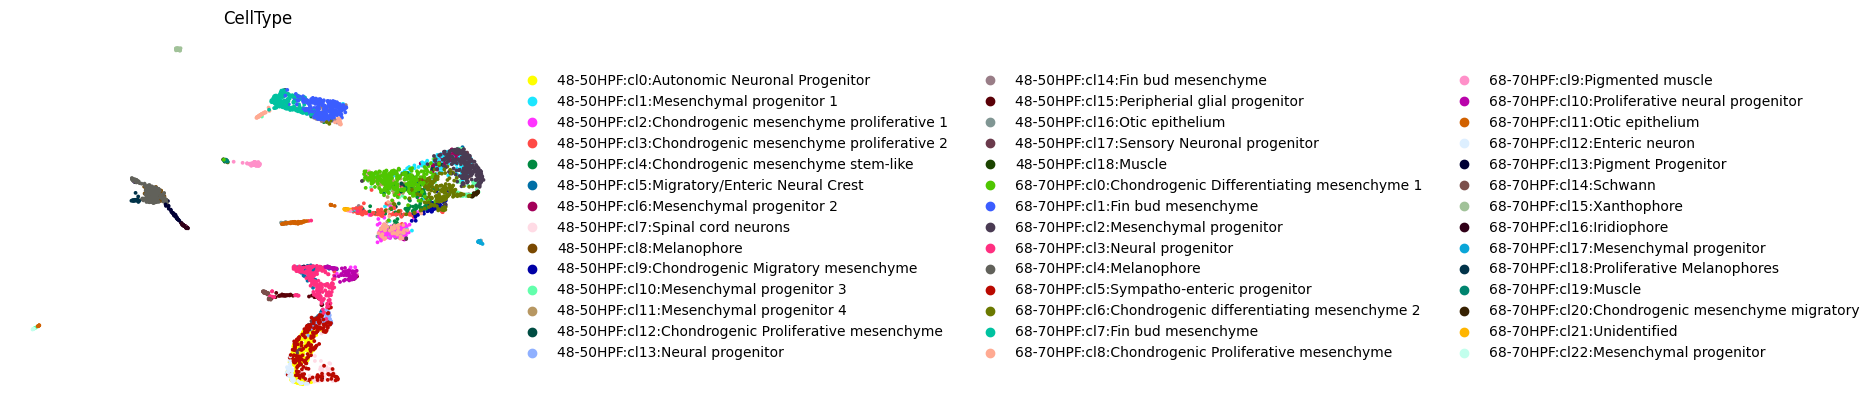

In [ ]:
# set pca and umap
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T


sc.pl.umap(adata, frameon=False, color="CellType")

# save dataset as anndata format
adata.write('/content/gdrive/MyDrive/singlecell_uribe/integrated_48h_68h_original_metadata/integrated_48h_68h_v20230802.h5ad')



In [ ]:
# reload dataset
adata_file = '/content/gdrive/MyDrive/singlecell_uribe/integrated_48h_68h_original_metadata/integrated_48h_68h_v20230802.h5ad' #copy the path of your adata_file
adata = sc.read_h5ad(adata_file)

In [ ]:
adata

AnnData object with n_obs × n_vars = 4014 × 15600
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.1.2', 'seurat_clusters', 'CellType', 'integrated_snn_res.1.2', 'ClustbyNum', 'TopLevelCat', 'TimeTopCat', 'FinalCat', 'barcode', 'UMAP_1', 'UMAP_2', 'sample_batch', 'Clusters', '_X', '_Y', 'batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'S_score', 'G2M_score', 'phase', 'clusters_gradients', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'spearmans_score', 'velocity_score'
    un

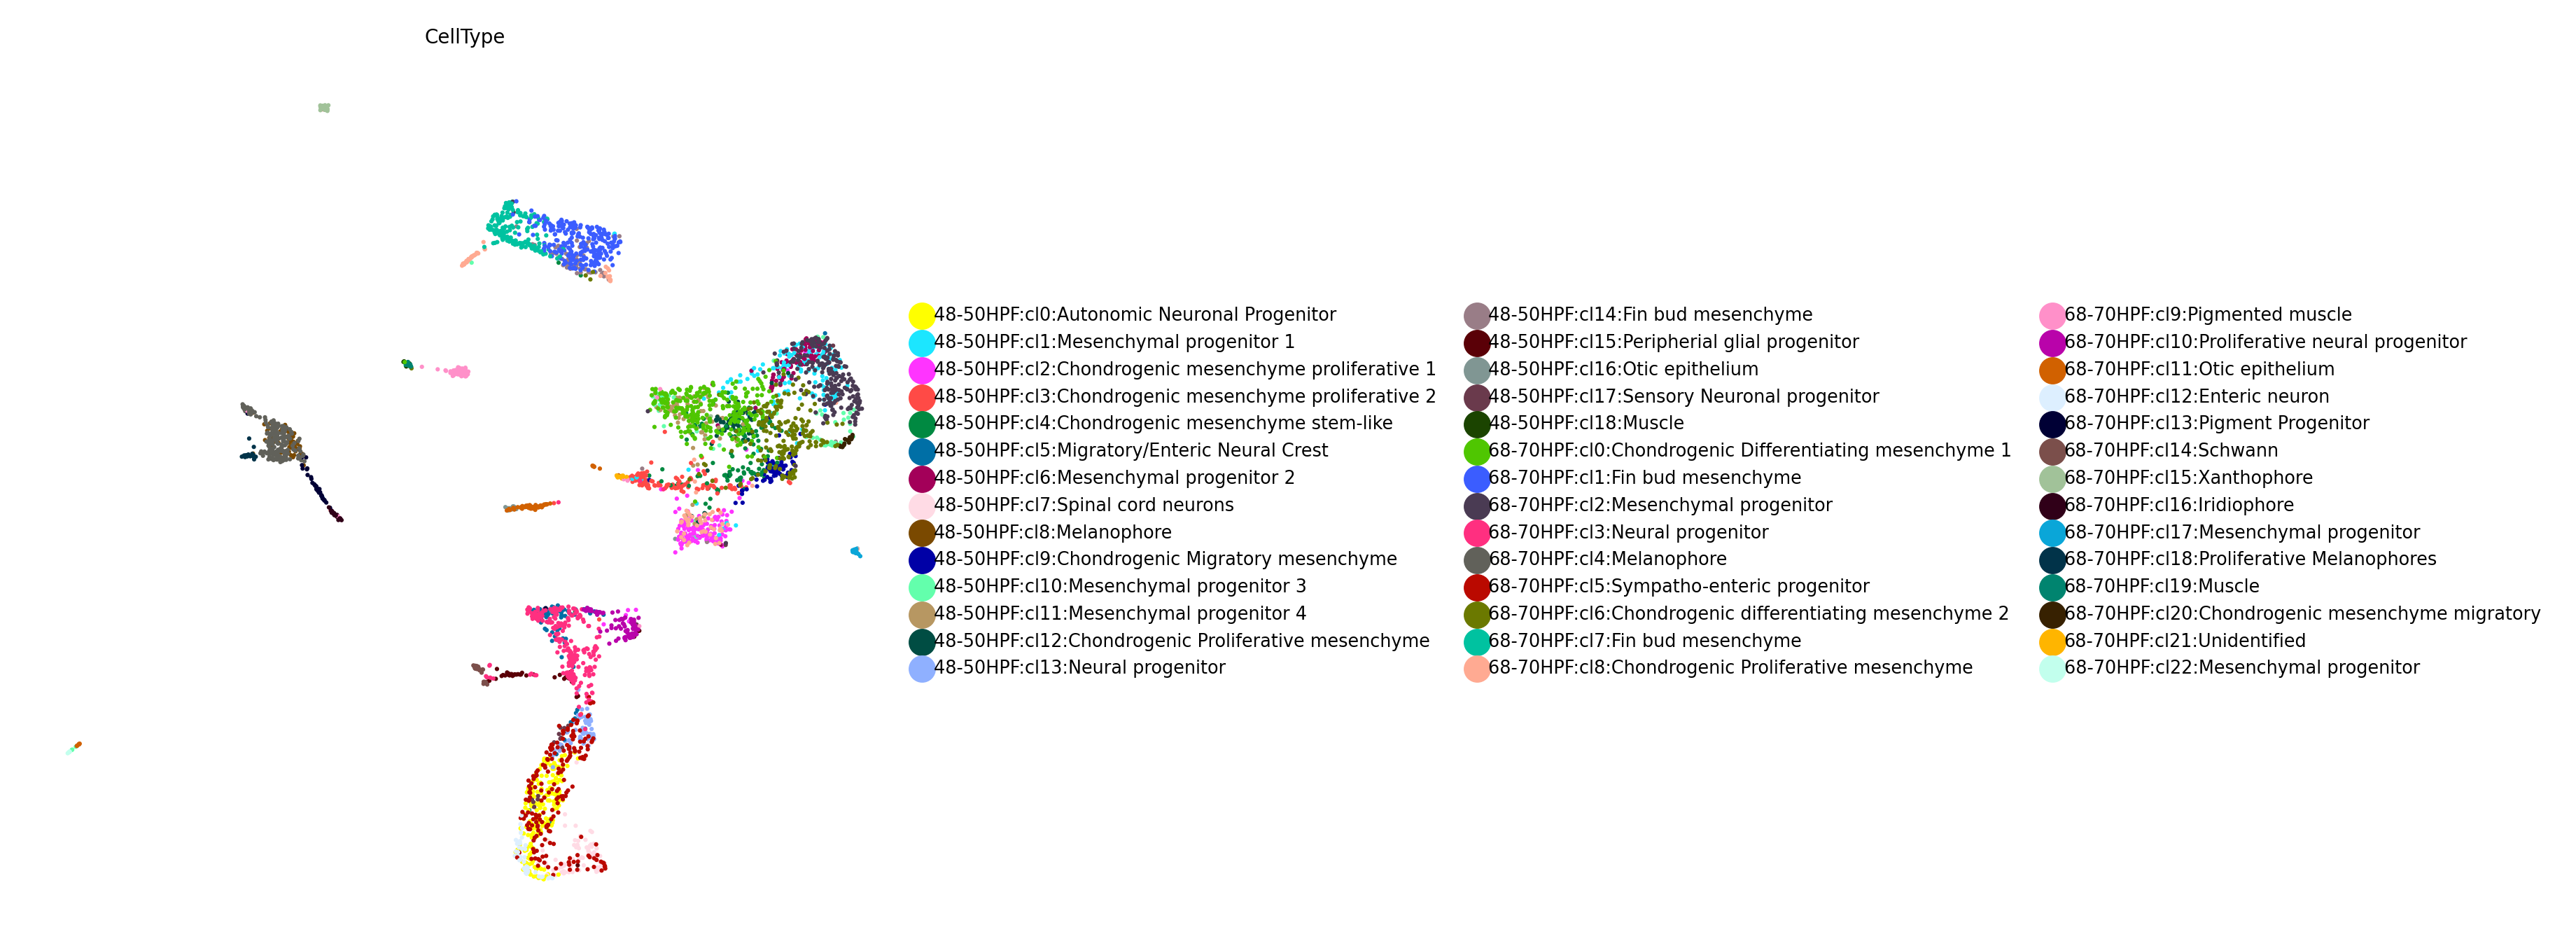

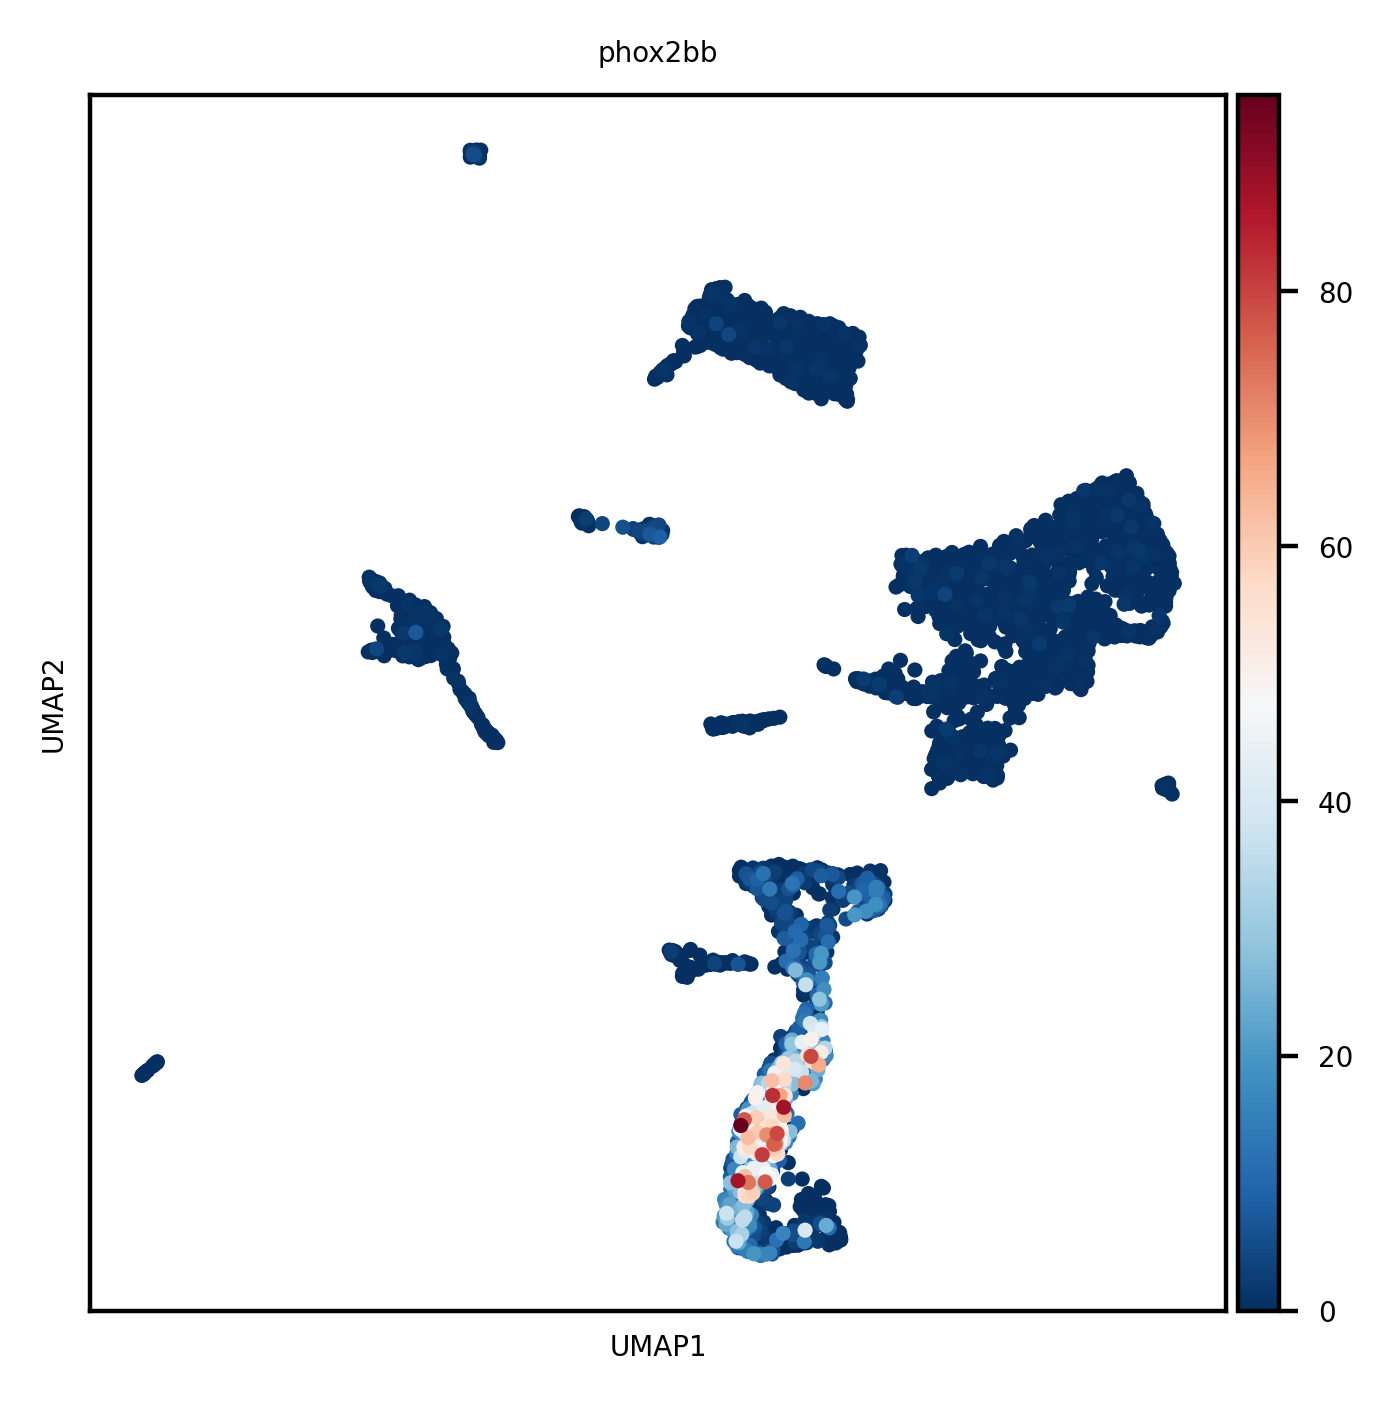

In [ ]:
sc.set_figure_params(scanpy=True, fontsize=5, dpi=200)
sc.pl.umap(adata, frameon=False, color="CellType", size=5)

sc.pl.umap(adata, color=['phox2bb'])

In [ ]:
# here, make a dot plot with the main markers to reproduce the elife paper figure

In [ ]:
adata

AnnData object with n_obs × n_vars = 4018 × 19248
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.1.2', 'seurat_clusters', 'CellType', 'integrated_snn_res.1.2', 'ClustbyNum', 'TopLevelCat', 'TimeTopCat', 'FinalCat', 'barcode', 'UMAP_1', 'UMAP_2'
    uns: 'CellType_colors'
    obsm: 'X_pca', 'X_umap'

In [ ]:
# load loom files for spliced/unspliced matrices for each sample:
ldata1 = scv.read('/content/gdrive/MyDrive/singlecell_uribe/velocyto/sox10_48h_cellranger211_GRCZ10.loom')
ldata2= scv.read('/content/gdrive/MyDrive/singlecell_uribe/velocyto/outs_68h.loom')

In [ ]:
# rename barcodes in order to merge:
barcodes = [bc.split(':')[1] for bc in ldata1.obs.index.tolist()]
barcodes = [bc[0:len(bc)-1] + '_10' for bc in barcodes]
ldata1.obs.index = barcodes

barcodes = [bc.split(':')[1] for bc in ldata2.obs.index.tolist()]
barcodes = [bc[0:len(bc)-1] + '_11' for bc in barcodes]
ldata2.obs.index = barcodes

In [ ]:
# make variable names unique
ldata1.var_names_make_unique()
ldata2.var_names_make_unique()

In [ ]:
# concatenate the three loom
ldata = ldata1.concatenate([ldata2])

In [ ]:
# merge matrices into the original adata object

adata = scv.utils.merge(adata, ldata, id_length=10)


In [ ]:
adata

AnnData object with n_obs × n_vars = 4014 × 15600
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.1.2', 'seurat_clusters', 'CellType', 'integrated_snn_res.1.2', 'ClustbyNum', 'TopLevelCat', 'TimeTopCat', 'FinalCat', 'barcode', 'UMAP_1', 'UMAP_2', 'sample_batch', 'Clusters', '_X', '_Y', 'batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'CellType_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

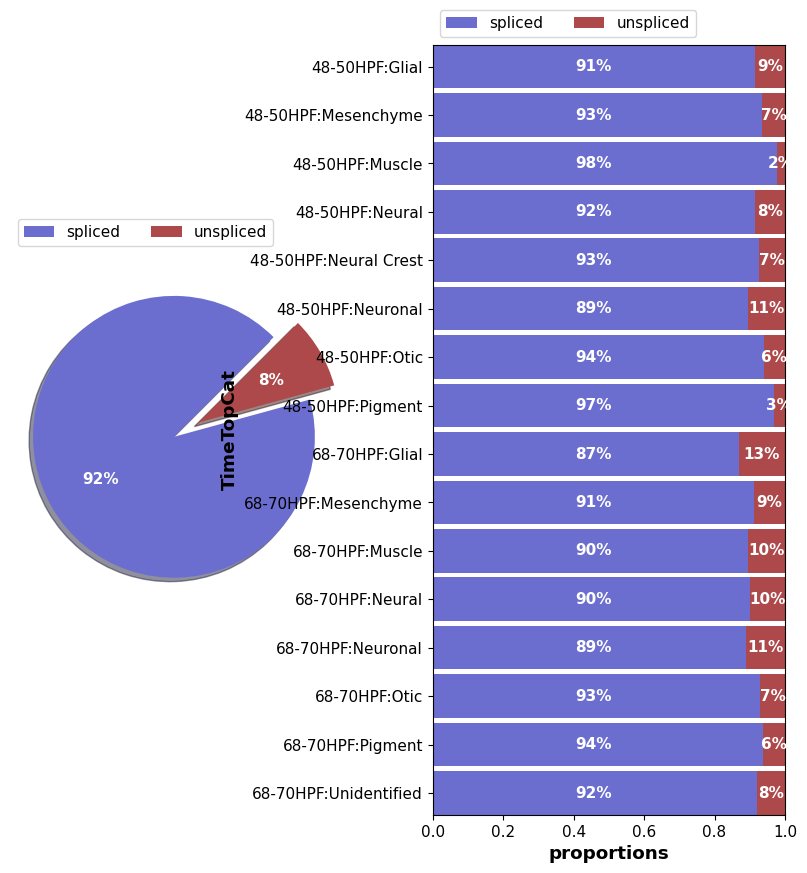

In [ ]:
scv.pl.proportions(adata, groupby='TimeTopCat', figsize=(10, 10), fontsize=11)

In [ ]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata, n_pcs=20, n_neighbors=50)

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:23) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [ ]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/2 cores)


  0%|          | 0/3976 [00:00<?, ?gene/s]

    finished (0:45:53) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [ ]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

computing velocities


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    finished (0:00:26) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/2 cores)


  0%|          | 0/4014 [00:00<?, ?cells/s]

    finished (0:01:56) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [4]:
adata = sc.read_h5ad('/content/gdrive/MyDrive/singlecell_uribe/integrated_48h_68h_original_metadata/integrated_48h_68h_v20230802.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 4014 × 15600
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.1.2', 'seurat_clusters', 'CellType', 'integrated_snn_res.1.2', 'ClustbyNum', 'TopLevelCat', 'TimeTopCat', 'FinalCat', 'barcode', 'UMAP_1', 'UMAP_2', 'sample_batch', 'Clusters', '_X', '_Y', 'batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'S_score', 'G2M_score', 'phase', 'clusters_gradients', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'spearmans_score', 'velocity_score'
    un

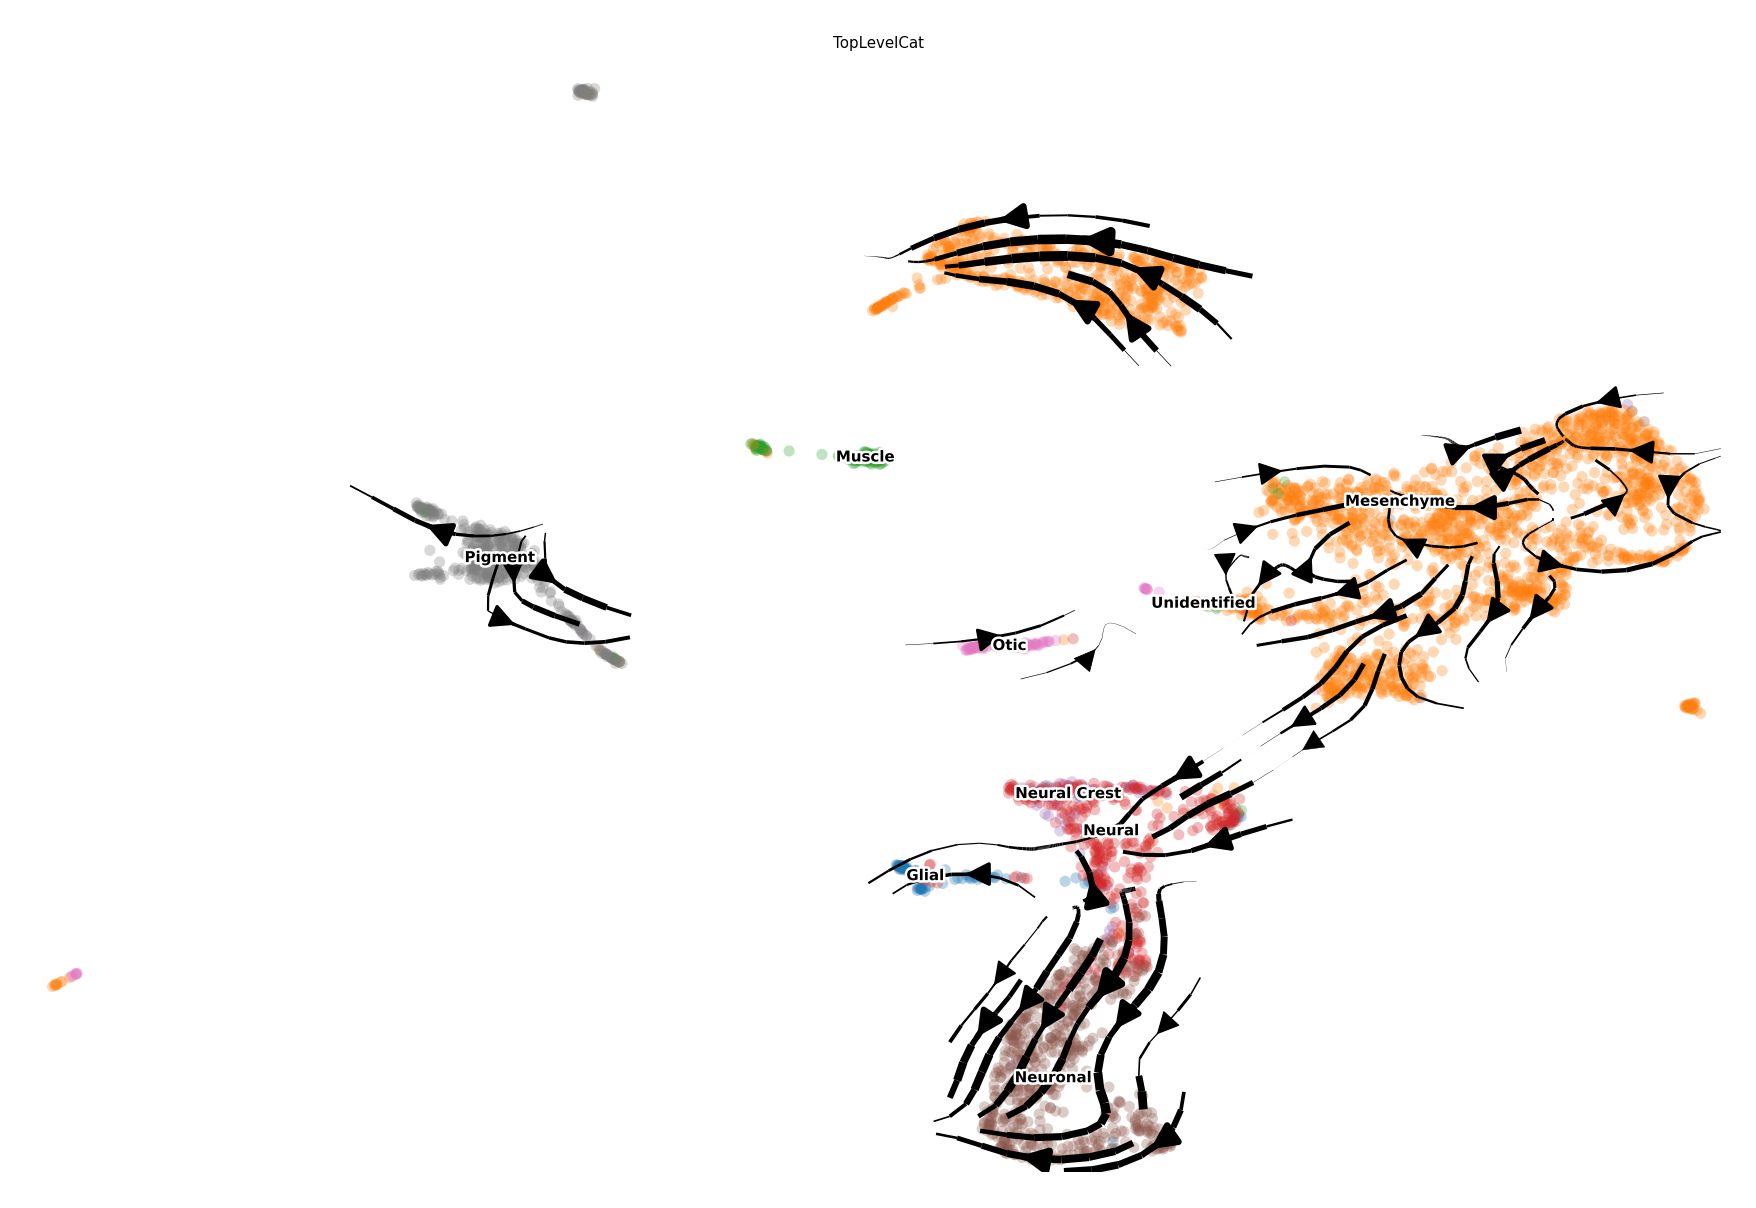

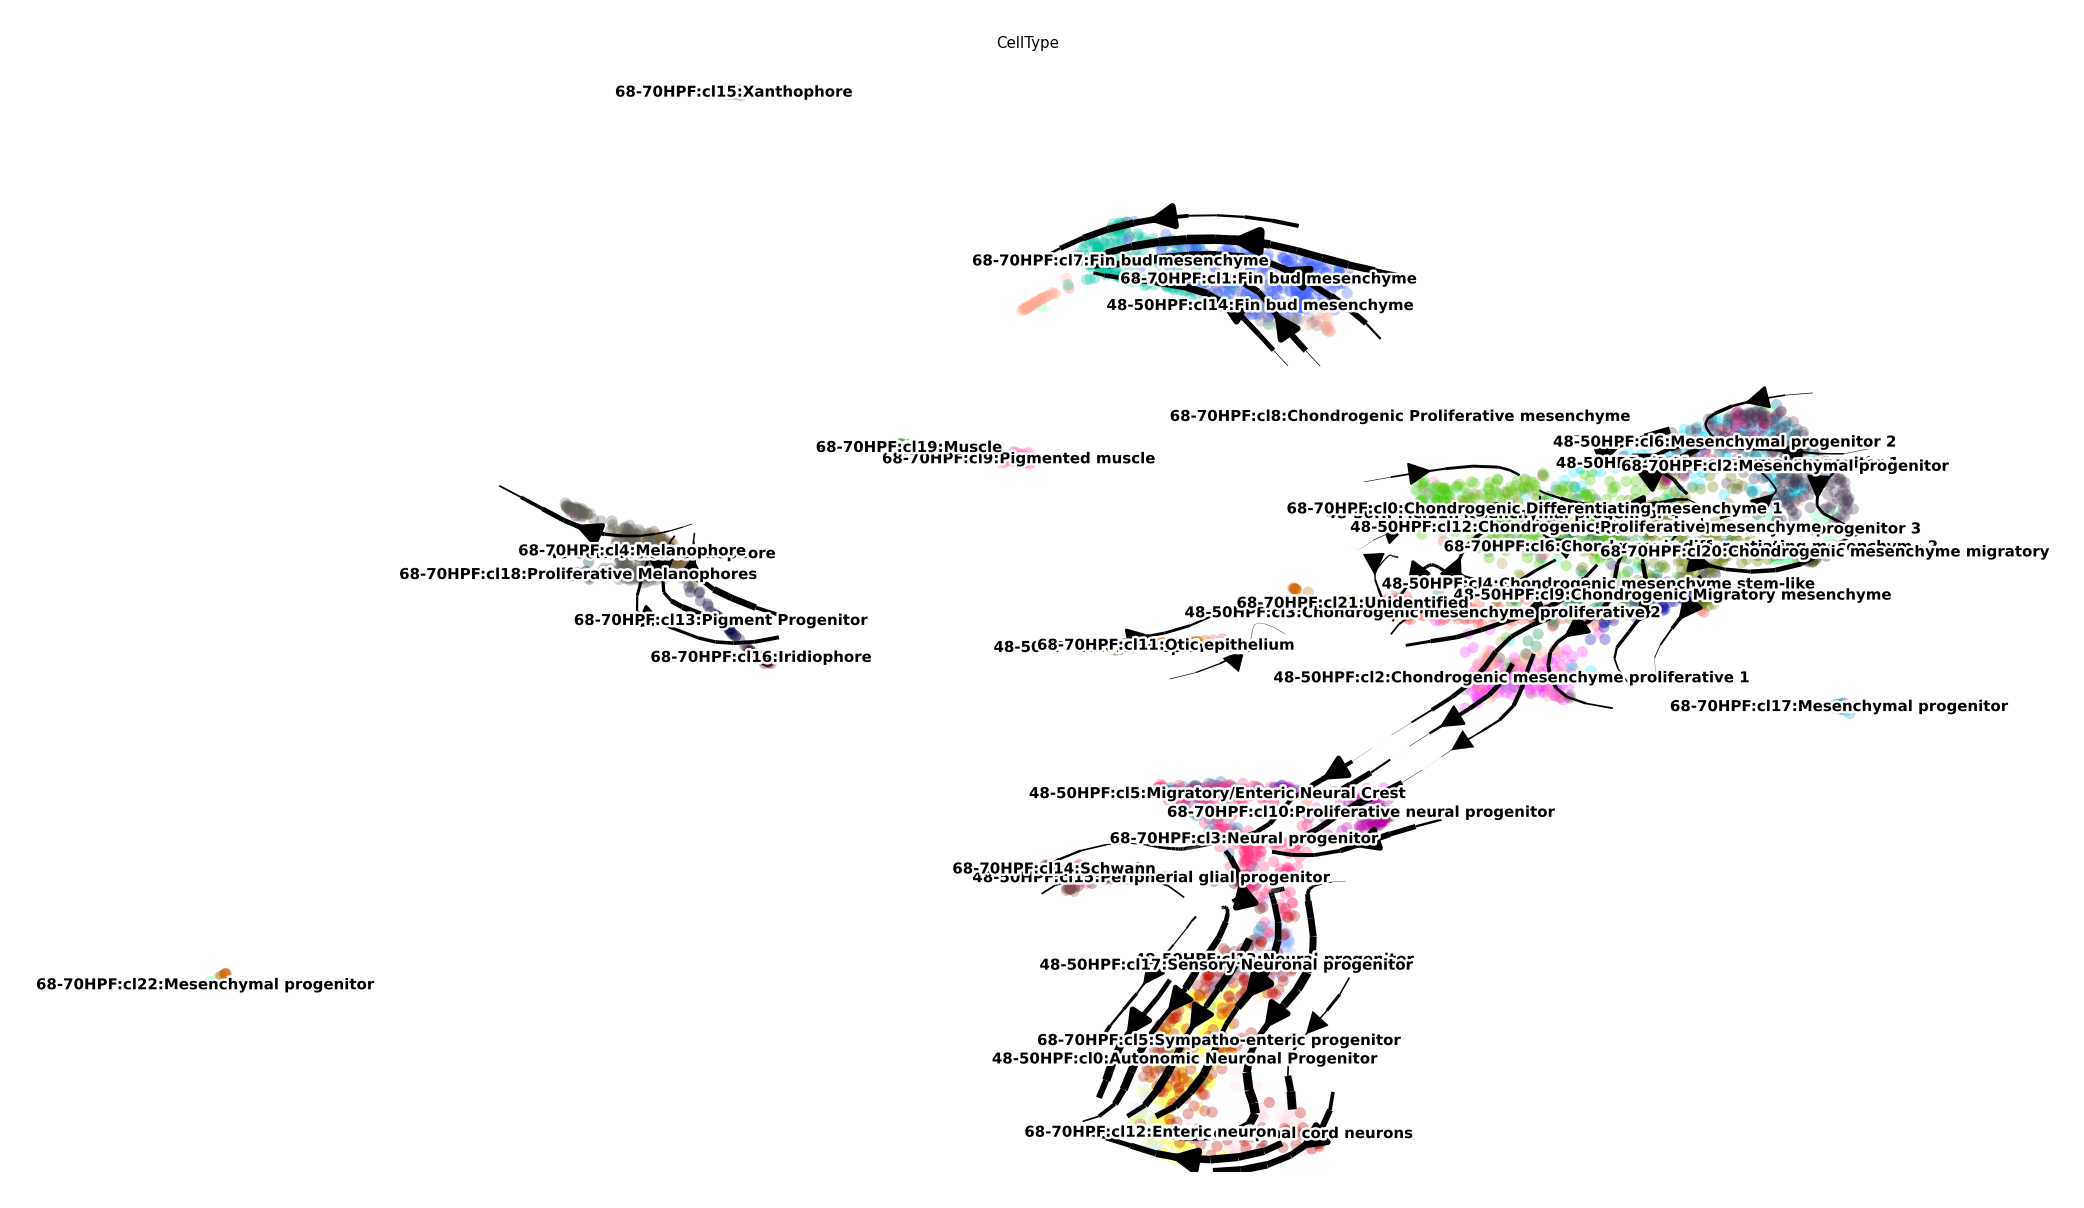

In [6]:
scv.set_figure_params('scvelo', fontsize=3, dpi=180)
scv.pl.velocity_embedding_stream(adata, basis='umap', color='TopLevelCat', size=20)
scv.pl.velocity_embedding_stream(adata, basis='umap', color='CellType', size=20)

In [ ]:
adata.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt RNA_snn_res.1.2  \
AAACCTGGTT        48HPF        7914          1553           0               5   
AAACCTGGTT-1      48HPF        4821          1561           0               0   
AAACGGGAGA        48HPF       12765          2257           0               1   
AAACGGGAGT        48HPF        9643          2058           0               4   
AAACGGGCAC        48HPF        3912          1331           0               7   
...                 ...         ...           ...         ...             ...   
TTTGTCAAGA        69HPF        5061          1491           0               2   
TTTGTCAGTA        69HPF        5609          1486           0               7   
TTTGTCAGTG        69HPF        3759          1237           0              14   
TTTGTCATCC        69HPF        2814           788           0              15   
TTTGTCATCG-1      69HPF        4333          1285           0               1   

             seurat_clusters                                        CellType  \
AAACCTGGTT                 9     48-50HPF:cl5:Migratory/Enteric Neural Crest   
AAACCTGGTT-1              13      48-50HPF:cl0:Autonomic Neuronal Progenitor   
AAACGGGAGA                 2           48-50HPF:cl1:Mesenchymal progenitor 1   
AAACGGGAGT                 1  48-50HPF:cl4:Chondrogenic mesenchyme stem-like   
AAACGGGCAC                15                48-50HPF:cl7:Spinal cord neurons   
...                      ...                                             ...   
TTTGTCAAGA                 0             68-70HPF:cl2:Mesenchymal progenitor   
TTTGTCAGTA                 7                 68-70HPF:cl7:Fin bud mesenchyme   
TTTGTCAGTG                21                           68-70HPF:cl14:Schwann   
TTTGTCATCC                22                       68-70HPF:cl15:Xanthophore   
TTTGTCATCG-1               3                 68-70HPF:cl1:Fin bud mesenchyme   

             integrated_snn_res.1.2     ClustbyNum   TopLevelCat  ...  \
AAACCTGGTT                        9   48-50HPF:cl5  Neural Crest  ...   
AAACCTGGTT-1                     13   48-50HPF:cl0      Neuronal  ...   
AAACGGGAGA                        2   48-50HPF:cl1    Mesenchyme  ...   
AAACGGGAGT                        1   48-50HPF:cl4    Mesenchyme  ...   
AAACGGGCAC                       15   48-50HPF:cl7      Neuronal  ...   
...                             ...            ...           ...  ...   
TTTGTCAAGA                        0   68-70HPF:cl2    Mesenchyme  ...   
TTTGTCAGTA                        7   68-70HPF:cl7    Mesenchyme  ...   
TTTGTCAGTG                       21  68-70HPF:cl14         Glial  ...   
TTTGTCATCC                       22  68-70HPF:cl15       Pigment  ...   
TTTGTCATCG-1                      3   68-70HPF:cl1    Mesenchyme  ...   

             velocity_confidence velocity_confidence_transition   S_score  \
AAACCTGGTT              0.757671                       0.524829 -0.725061   
AAACCTGGTT-1            0.934545                       0.241362 -0.777540   
AAACGGGAGA              0.857032                       0.345552  0.503973   
AAACGGGAGT              0.821370                       0.304090  0.848336   
AAACGGGCAC              0.865130                       0.163778 -0.638231   
...                          ...                            ...       ...   
TTTGTCAAGA              0.873429                       0.261988 -0.432192   
TTTGTCAGTA              0.857943                       0.280065 -0.063307   
TTTGTCAGTG              0.972781                      -0.102802 -0.595375   
TTTGTCATCC              0.863054                      -0.104973 -0.073101   
TTTGTCATCG-1            0.839724                       0.426556 -0.474677   

              G2M_score  phase clusters_gradients    root_cells  end_points  \
AAACCTGGTT     0.184516    G2M          G2M_score  7.378300e-06    0.036551   
AAACCTGGTT-1   0.561208    G2M          G2M_score  5.727029e-07    1.000000   
AAACGGGAGA    -0.093148      S          

In [ ]:
# reload dataset
adata_file = '/content/gdrive/MyDrive/singlecell_uribe/integrated_48h_68h_original_metadata/integrated_48h_68h_v20230802.h5ad' #copy the path of your adata_file
adata = sc.read_h5ad(adata_file)

In [ ]:
#used this tutorial -> https://www.youtube.com/watch?v=68ZUcr1rSCU&t=325s
subset = ["Neural Crest","Neural", "Neuronal"]
neuronal_adata = adata[adata.obs.TopLevelCat.isin(subset)]


In [ ]:
neuronal_adata

View of AnnData object with n_obs × n_vars = 1014 × 15600
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.1.2', 'seurat_clusters', 'CellType', 'integrated_snn_res.1.2', 'ClustbyNum', 'TopLevelCat', 'TimeTopCat', 'FinalCat', 'barcode', 'UMAP_1', 'UMAP_2', 'sample_batch', 'Clusters', '_X', '_Y', 'batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'S_score', 'G2M_score', 'phase', 'clusters_gradients', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'spearmans_score', 'velocity_score

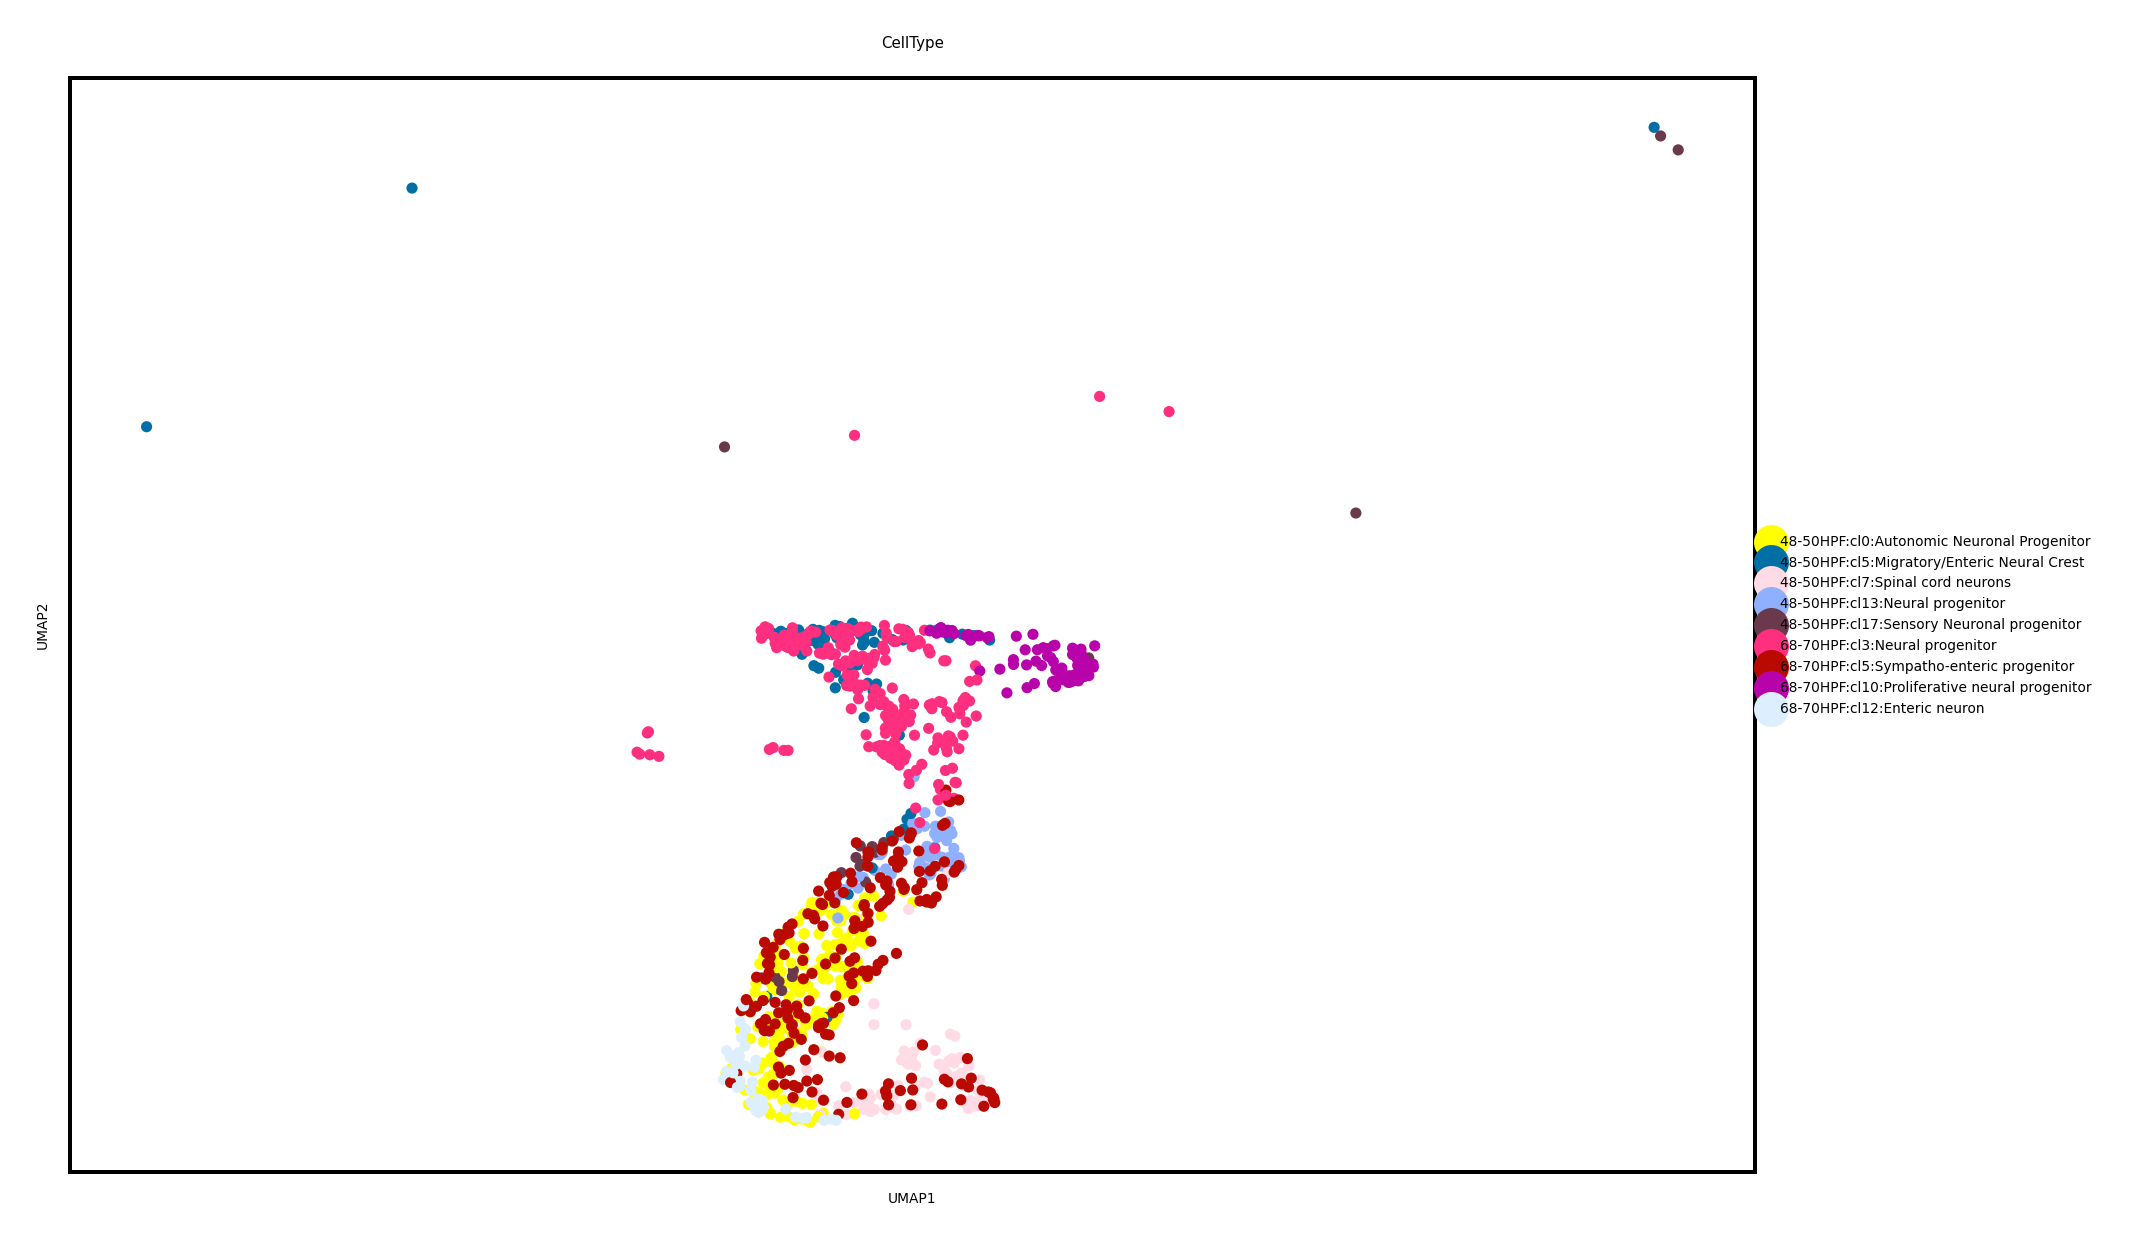

In [ ]:
sc.pl.umap(neuronal_adata, color='CellType', size= 20)

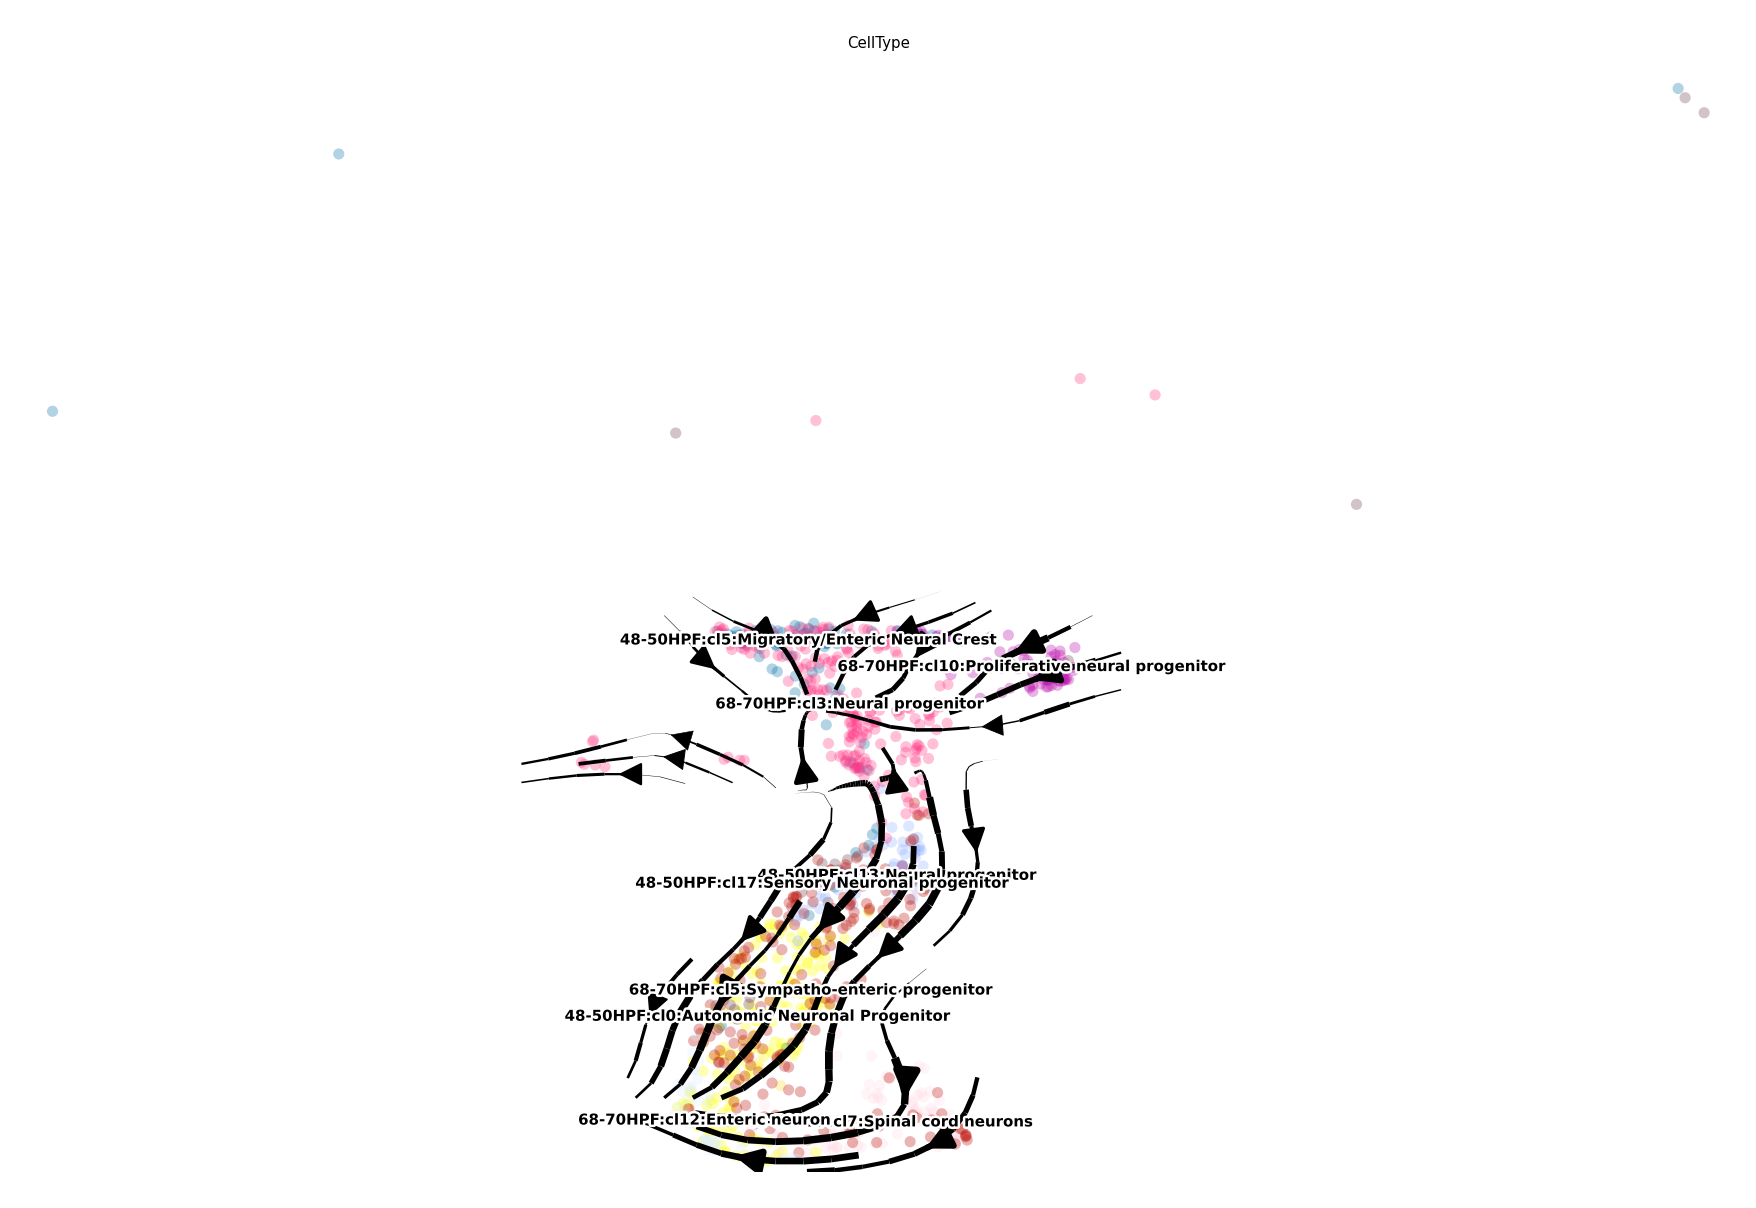

In [ ]:
scv.pl.velocity_embedding_stream(neuronal_adata, color="CellType", size=20)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


/usr/local/lib/python3.10/dist-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()
/usr/local/lib/python3.10/dist-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


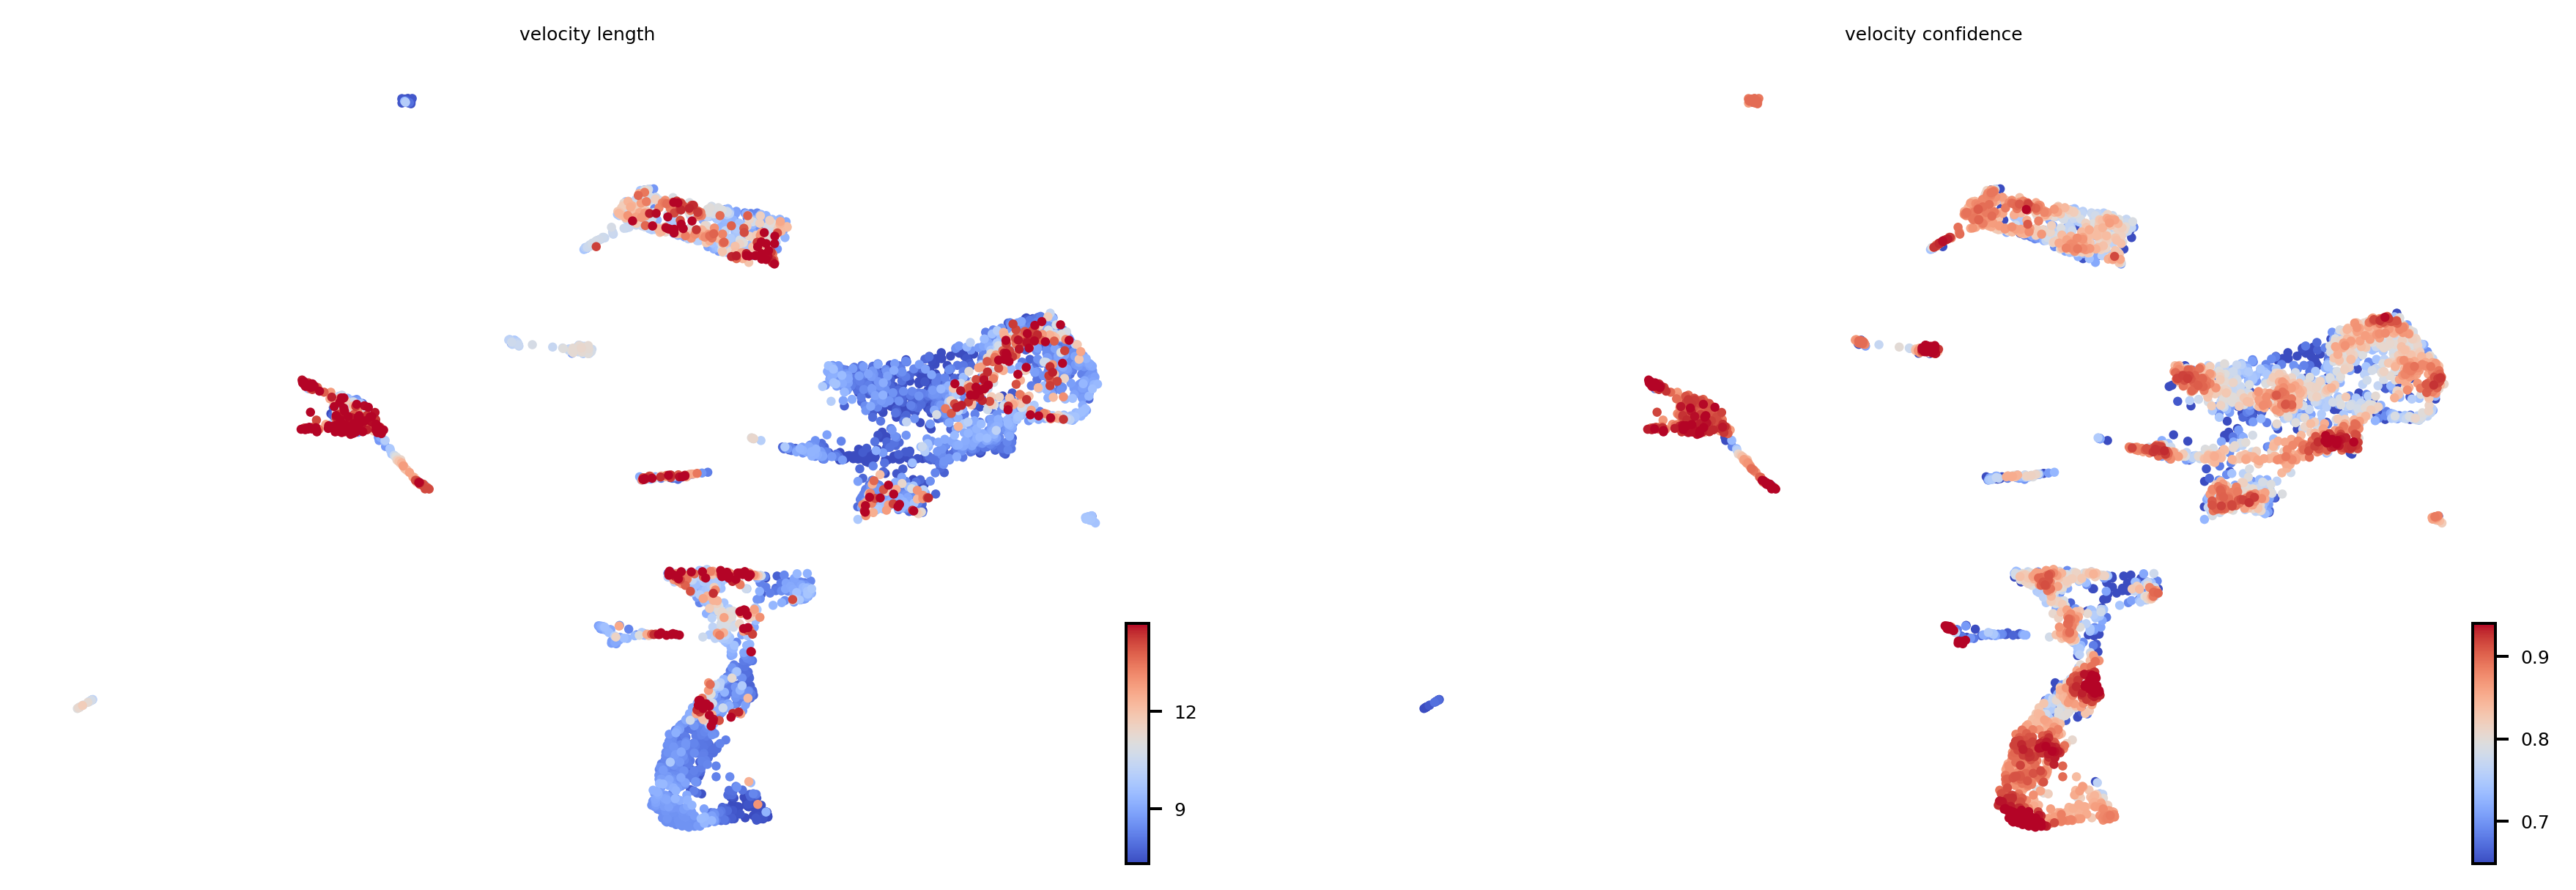

In [ ]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


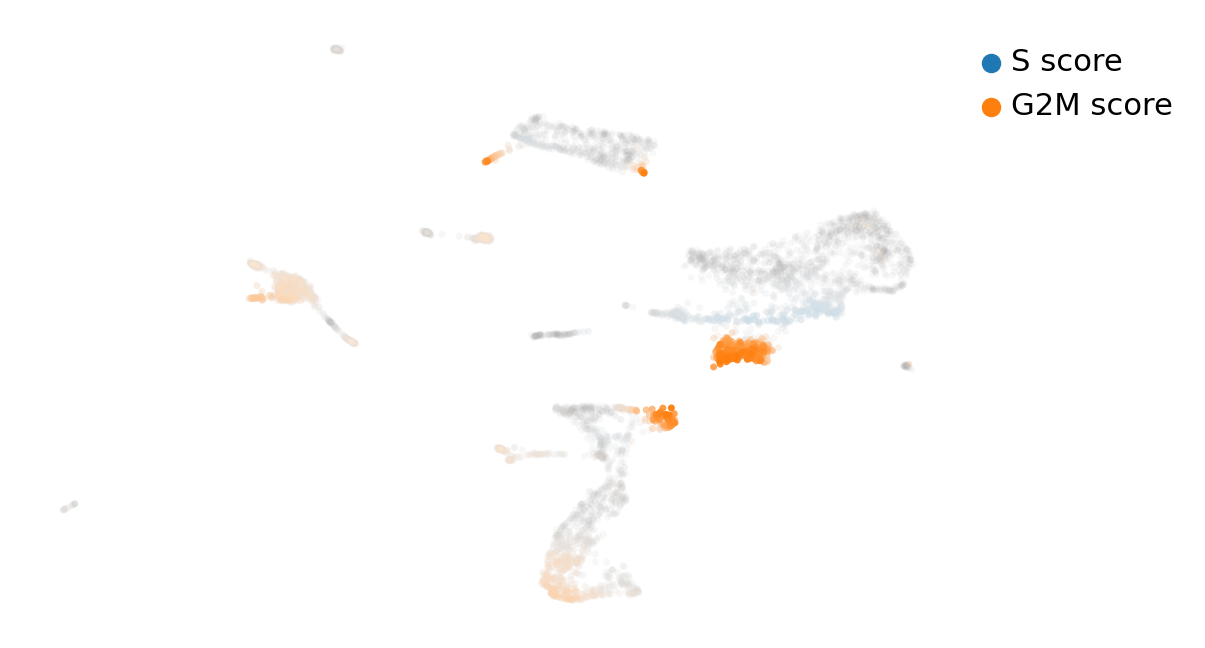

In [ ]:
scv.tl.score_genes_cell_cycle(adata)
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95], color_map='viridis', vmax=2)

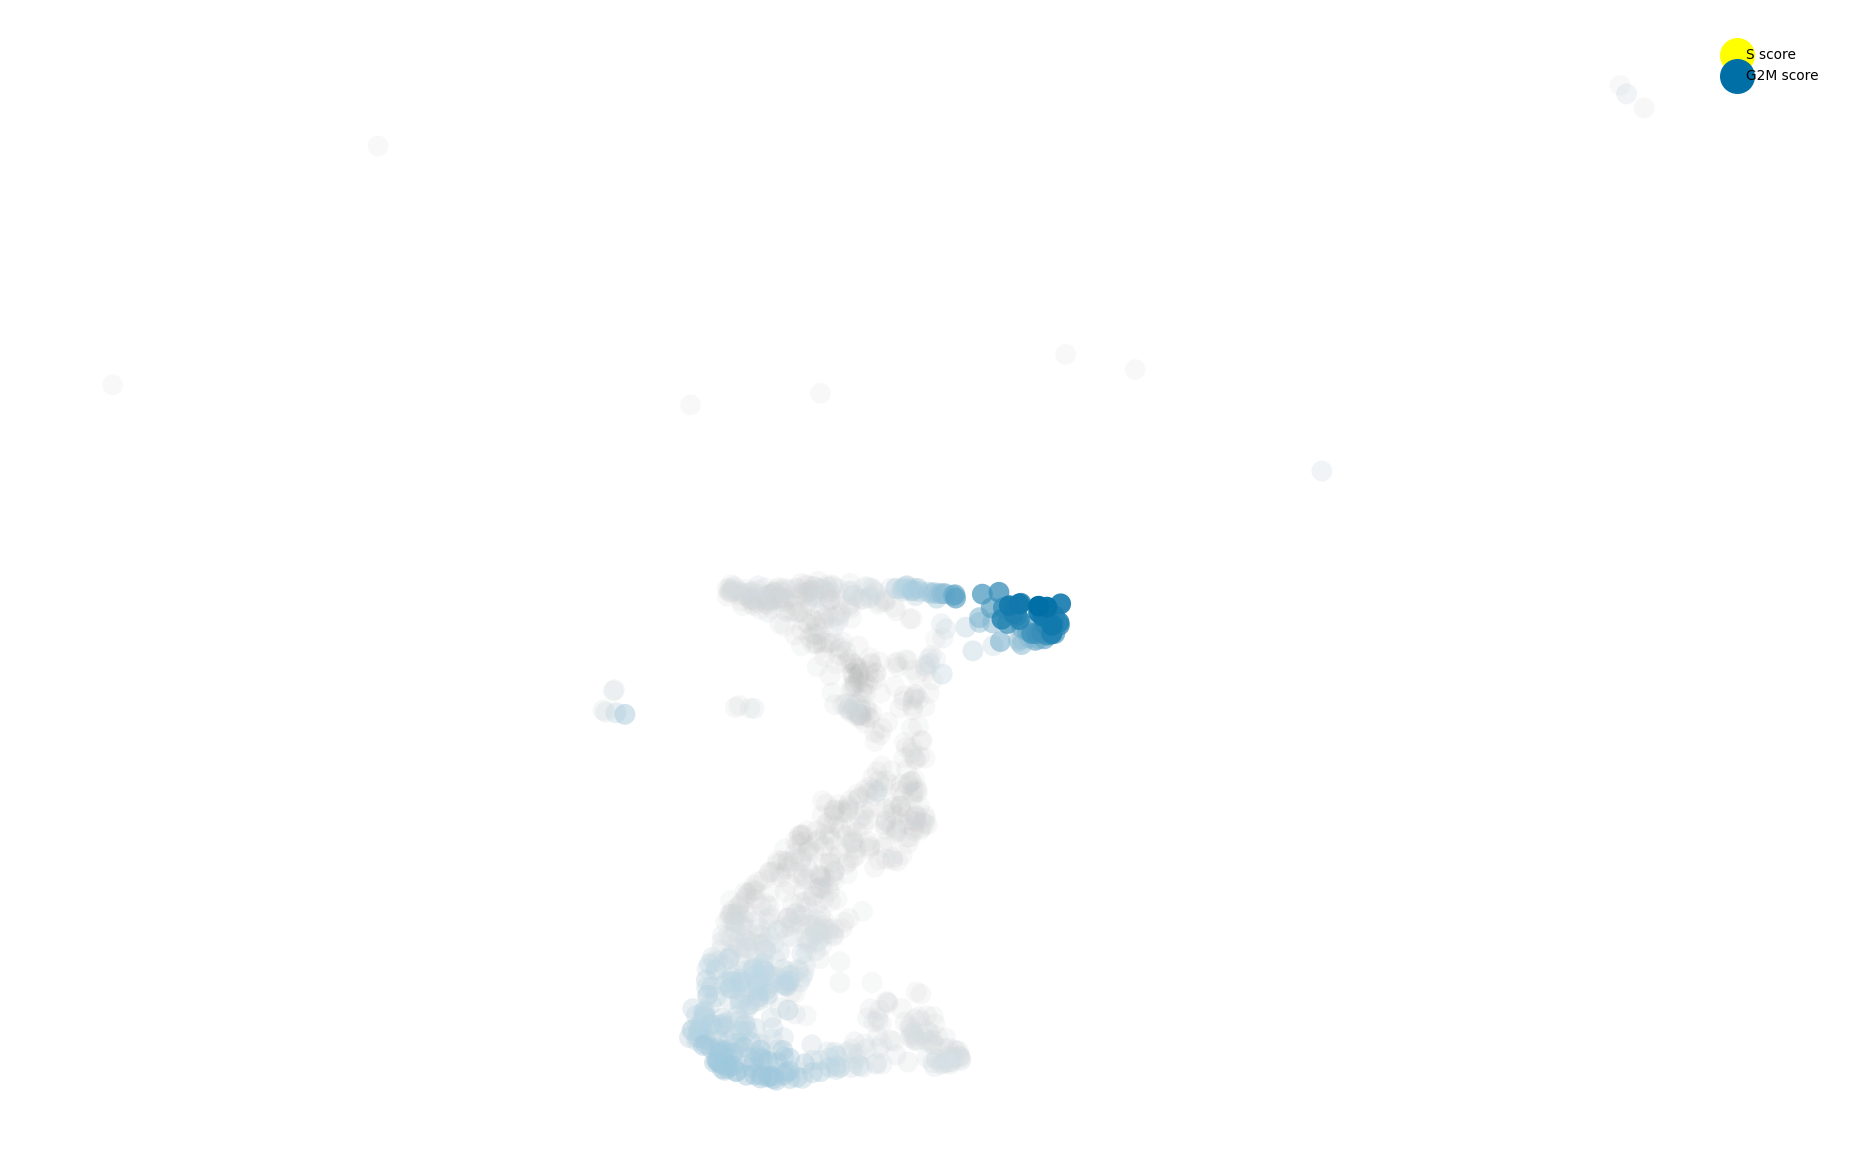

In [ ]:
scv.pl.scatter(neuronal_adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[20, 95],  vmax=2, color="CellType")

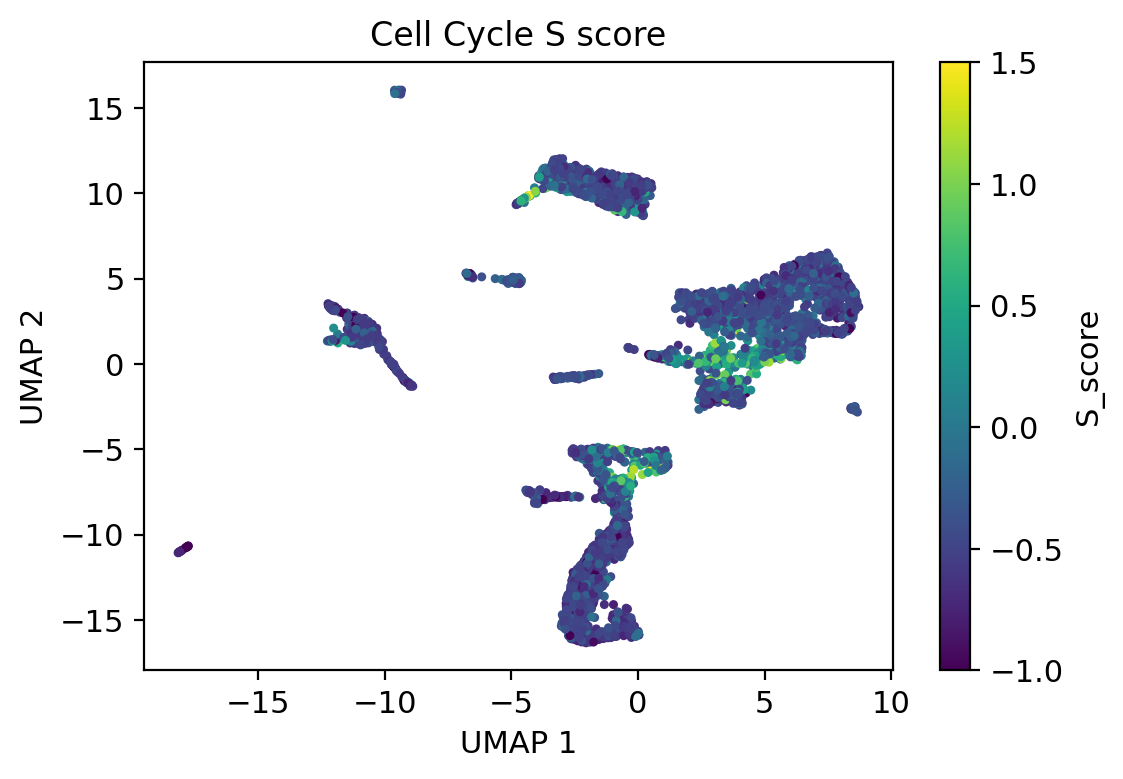

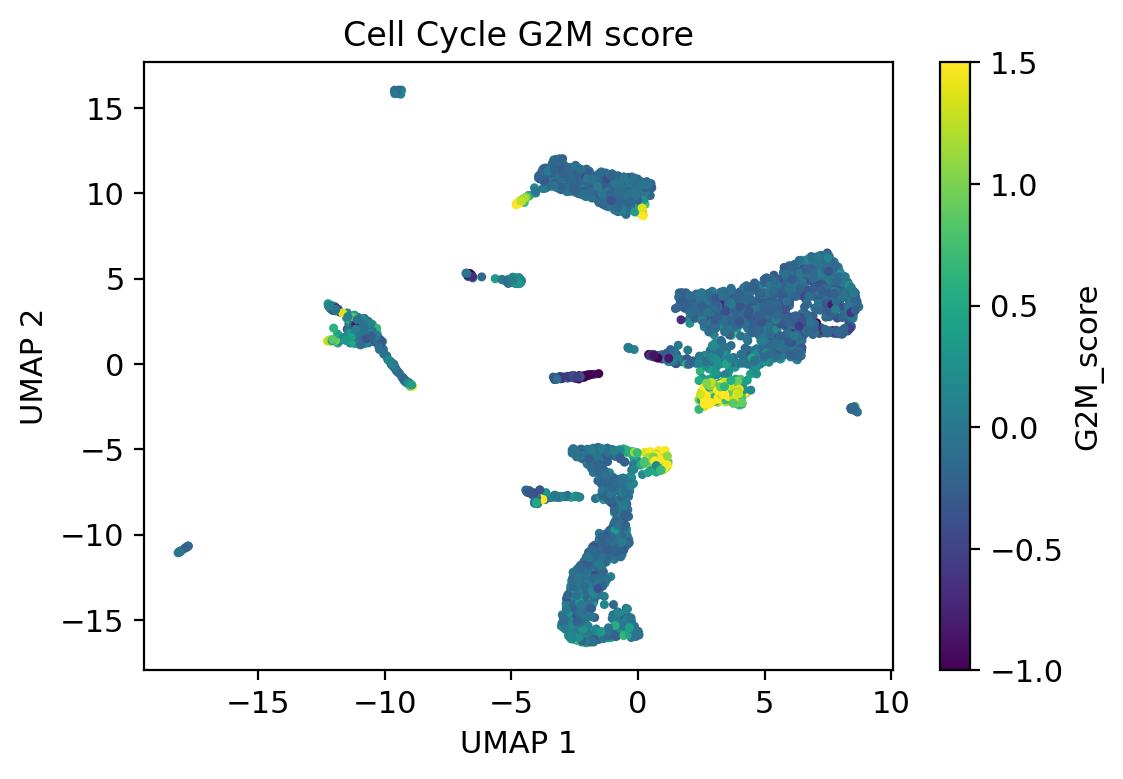

In [ ]:

# Create the scatter plot with a custom color map using matplotlib
fig, ax = plt.subplots()
scatter = ax.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], c=adata.obs['S_score'], cmap='viridis', vmin=-1, vmax=1.5, s=5)
plt.colorbar(scatter, ax=ax, label='S_score')

# Add labels and title if needed
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_title('Cell Cycle S score')

# Create the scatter plot with a custom color map using matplotlib
fig, ax = plt.subplots()
scatter = ax.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], c=adata.obs['G2M_score'], cmap='viridis', vmin=-1, vmax=1.5, s=5)
plt.colorbar(scatter, ax=ax, label='G2M_score')

# Add labels and title if needed
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_title('Cell Cycle G2M score')

plt.show()

In [ ]:
scv.tl.rank_velocity_genes(adata, groupby='CellType', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ranking velocity genes


/usr/local/lib/python3.10/dist-packages/scvelo/tools/utils.py:501: DeprecationWarning: Please use `rankdata` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import rankdata


    finished (0:00:26) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


<ipython-input-37-91643fd6e293>:3: DeprecationWarning: `scvelo.read_load.get_df` is deprecated since scVelo v0.2.4 and will be removed in a future version. Please use `scvelo.core.get_df` instead.
  df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])


48-50HPF:cl0:Autonomic Neuronal Progenitor  \
0                                     nrxn1a   
1                                     cadpsb   
2                                     olfm1b   
3                                      glrbb   
4                                     ppp3ca   

  48-50HPF:cl1:Mesenchymal progenitor 1  \
0                                 hspa8   
1                                 palld   
2                                  jupa   
3                                myo1ea   
4                                  rpl7   

  48-50HPF:cl2:Chondrogenic mesenchyme proliferative 1  \
0                                              cenpi     
1                                              CDPF1     
2                                         zgc:110224     
3                                              lasp1     
4                                              kif23     

  48-50HPF:cl3:Chondrogenic mesenchyme proliferative 2  \
0                                              csf1a     
1                                            eif3s10     
2                                              rpl31     
3                                               pim2     
4                                               hbp1     

  48-50HPF:cl4:Chondrogenic mesenchyme stem-like  \
0                                         nccrp1   
1                                         ctdsp2   
2                                        tmem176   
3                                         dhrs3b   
4                                          enpp6   

  48-50HPF:cl5:Migratory/Enteric Neural Crest  \
0                                       celf2   
1                                       rdh8a   
2                                      ncam1a   
3                                      igsf11   
4                                      paplna   

  48-50HPF:cl6:Mesenchymal progenitor 2 48-50HPF:cl7:Spinal cord neurons  \
0                                gria3a                           kcnc3a   
1                                  rpl9                            fxyd6   
2                                  rpl8                            mpp2b   
3                                  rpl7                            syt6b   
4                                  ybx1                   si:ch73-60h1.1   

  48-50HPF:cl8:Melanophore 48-50HPF:cl9:Chondrogenic Migratory mesenchyme  \
0                  ddx39ab                                         nap1l1   
1                   ndufb8                                           rpl9   
2                     mtpn                                          csf1a   
3                   srsf2a                                        atp1b1a   
4                    snrpf                                           pora   

   ... 68-70HPF:cl13:Pigment Progenitor 68-70HPF:cl14:Schwann  \
0  ...                            pax7a                p4ha1b   
1  ...                           ptprea                cirh1a   
2  ...                           pcnxl2                 vamp5   
3  ...                 si:ch211-10a23.2                cox4i2   
4  ...                            rpl34               prkar1b   

  68-70HPF:cl15:Xanthophore 68-70HPF:cl16:Iridiophore  \
0                     larp7                     pax7a   
1                      lfng                     rbm28   
2                   igf2bp1                      fyna   
3                       ncl                     vps4b   
4                      sdha                       smo   

  68-70HPF:cl17:Mesenchymal progenitor  \
0                                 nudc   
1                                pold1   
2                                 rfc2   
3                             arhgap24   
4                                cep85   

  68-70HPF:cl18:Proliferative Melanophores 68-70HPF:cl19:Muscle  \
0                                    csrp2                 rpa3   
1                                   ndufb8                vps4b   
2                                  ddx39

In [ ]:
adata.write('/content/gdrive/MyDrive/singlecell_uribe/integrated_48h_68h_original_metadata/integrated_48h_68h_v20230802.h5ad')

NameError: ignored

In [ ]:
adata

AnnData object with n_obs × n_vars = 4014 × 15600
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.1.2', 'seurat_clusters', 'CellType', 'integrated_snn_res.1.2', 'ClustbyNum', 'TopLevelCat', 'TimeTopCat', 'FinalCat', 'barcode', 'UMAP_1', 'UMAP_2', 'sample_batch', 'Clusters', '_X', '_Y', 'batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'S_score', 'G2M_score', 'phase', 'clusters_gradients', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'spearmans_score', 'velocity_score'
    un

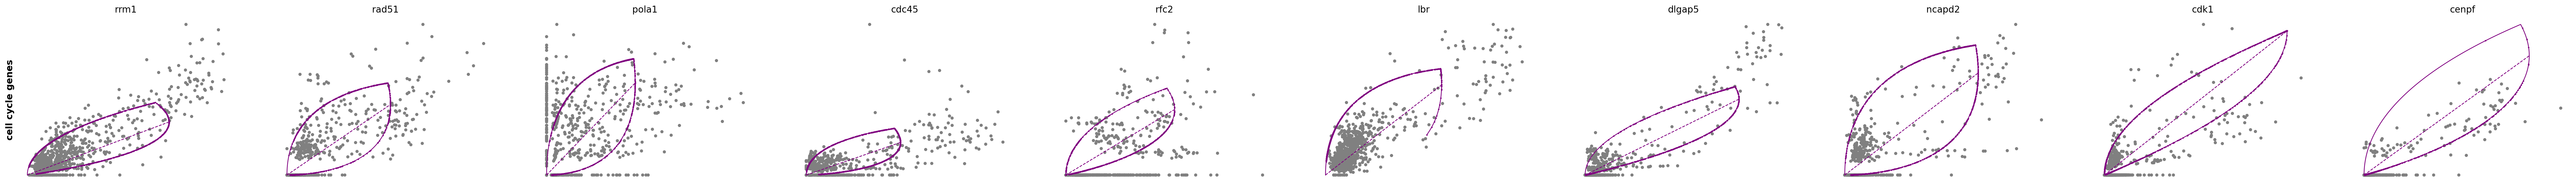

In [ ]:
scv.set_figure_params('scvelo')
s_genes, g2m_genes = scv.utils.get_phase_marker_genes(neuronal_adata)
s_genes = scv.get_df(neuronal_adata[:, s_genes], 'spearmans_score', sort_values=True).index
g2m_genes = scv.get_df(neuronal_adata[:, g2m_genes], 'spearmans_score', sort_values=True).index

kwargs = dict(frameon=False, ylabel='cell cycle genes')
scv.pl.scatter(neuronal_adata, list(s_genes[:5]) + list(g2m_genes[:5]), **kwargs)

In [ ]:
#make a list of all these cell cycle markers markers https://cdn.elifesciences.org/articles/60005/elife-60005-fig1-figsupp3-v1.jpg

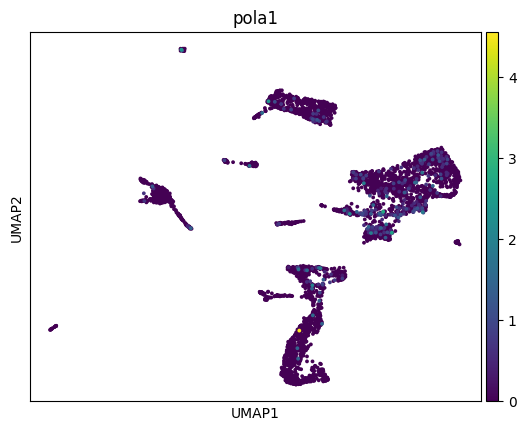

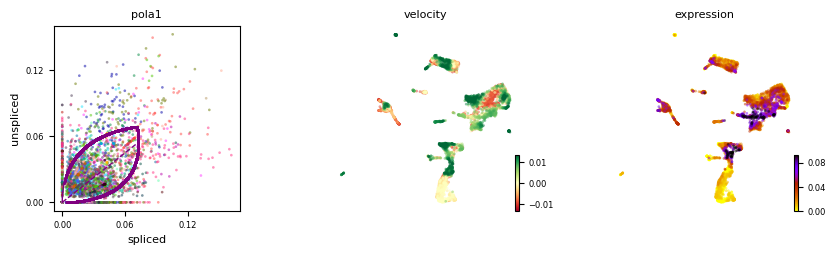

In [ ]:
sc.pl.umap(adata, color=['pola1'])
scv.pl.velocity(adata, var_names=['pola1'], color='CellType')

0


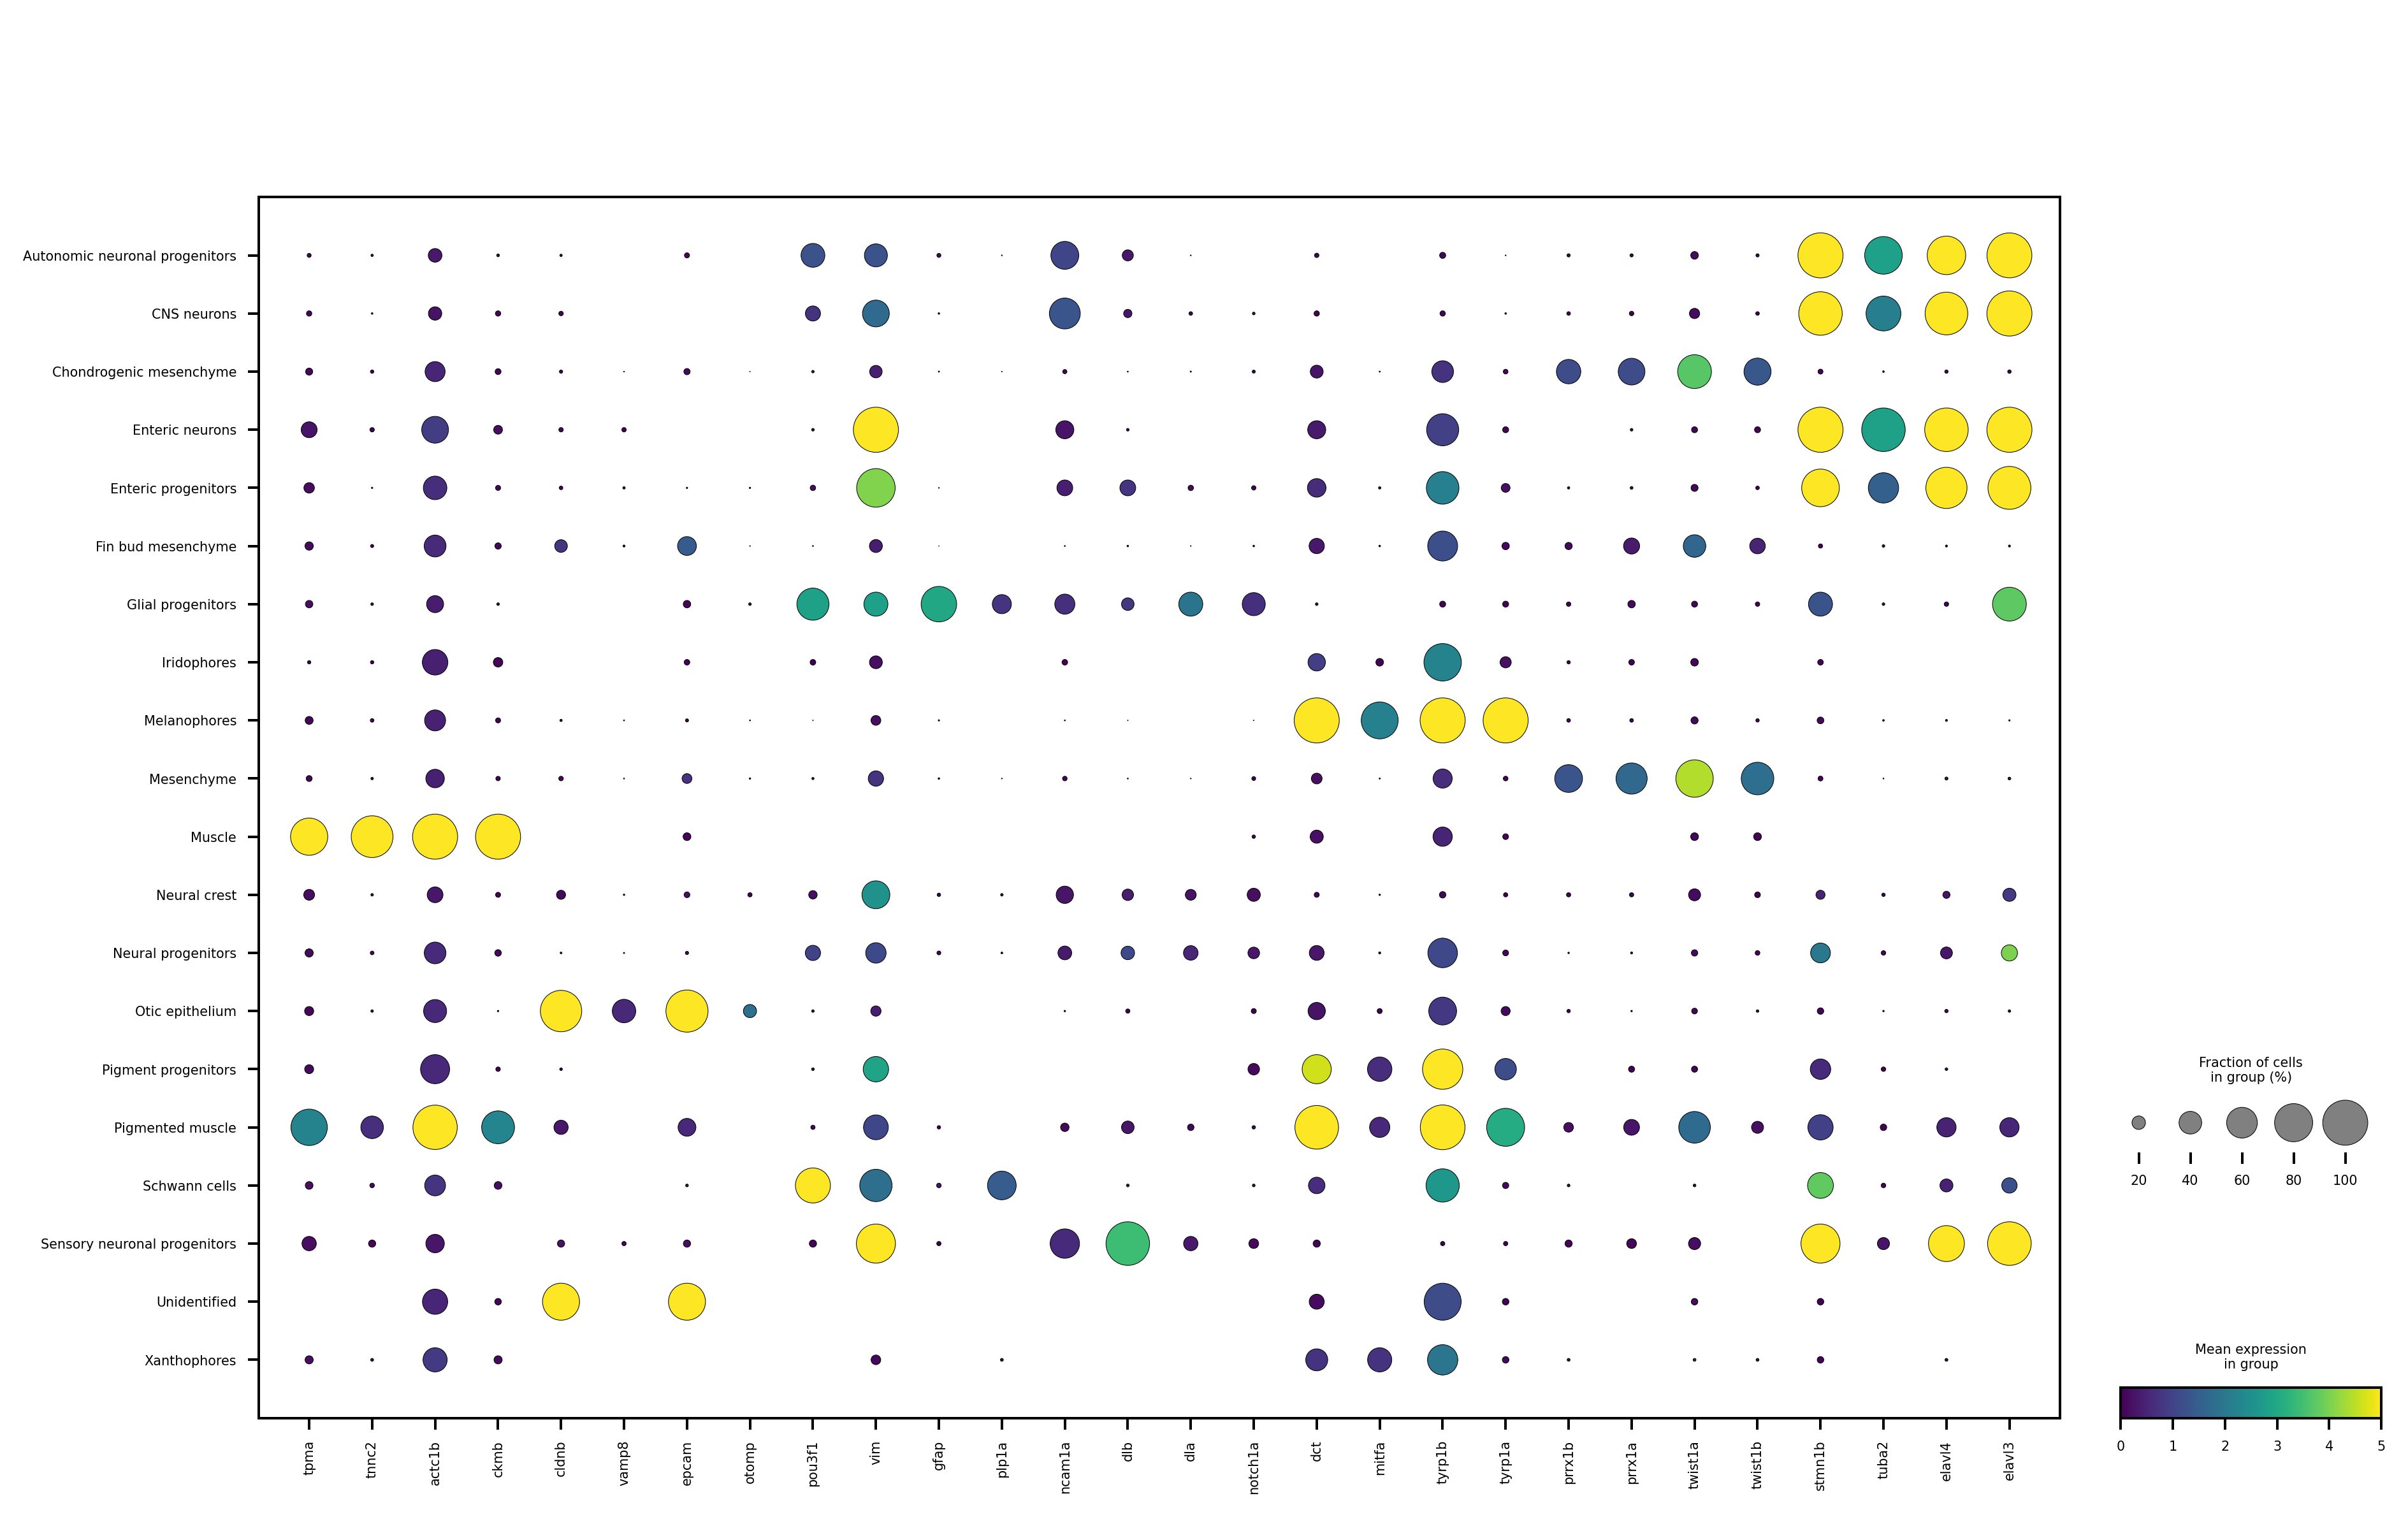

In [ ]:
var_names=['tpma', 'tnnc2', 'actc1b', 'ckmb', 'cldnb', 'vamp8','epcam', 'otomp', 'pou3f1', 'vim', 'gfap', 'plp1a', 'ncam1a', 'dlb', 'dla', 'notch1a', 'dct', 'mitfa', 'tyrp1b', 'tyrp1a', 'prrx1b', 'prrx1a', 'twist1a', 'twist1b', 'stmn1b', 'tuba2', 'elavl4', 'elavl3']

sc.pl.dotplot(adata, var_names=var_names, groupby='FinalCat', cmap= 'viridis', vmin=0, vmax=5 )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


computing terminal states
    identified 1 region of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:06) --> added 
    'latent_time', shared time (adata.obs)


/usr/local/lib/python3.10/dist-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


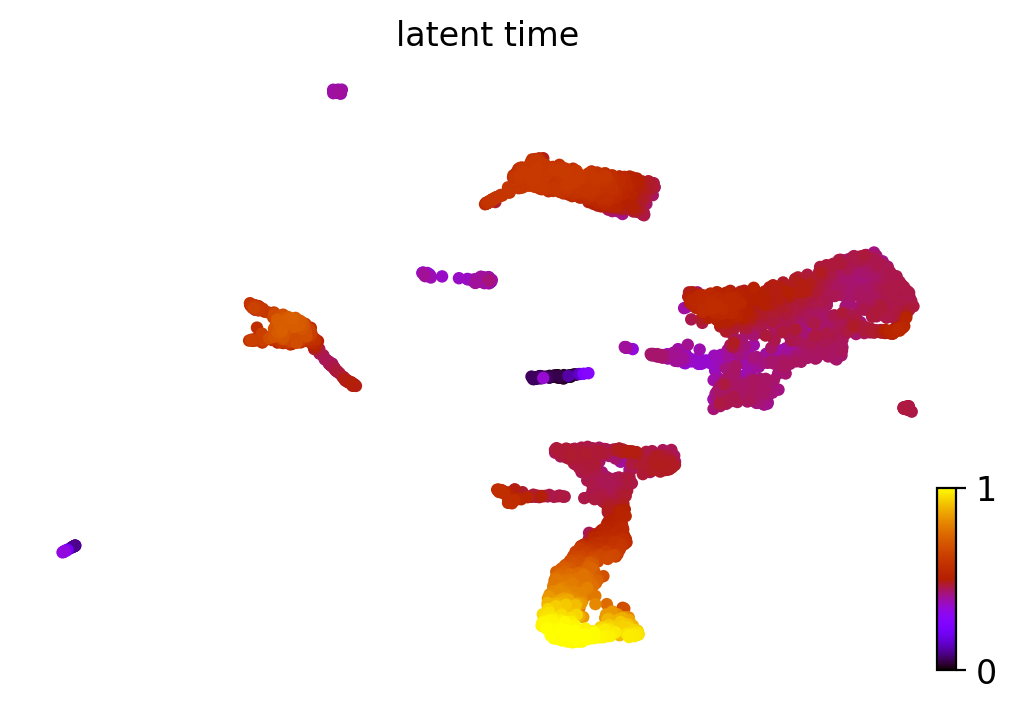

In [ ]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80, colorbar=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


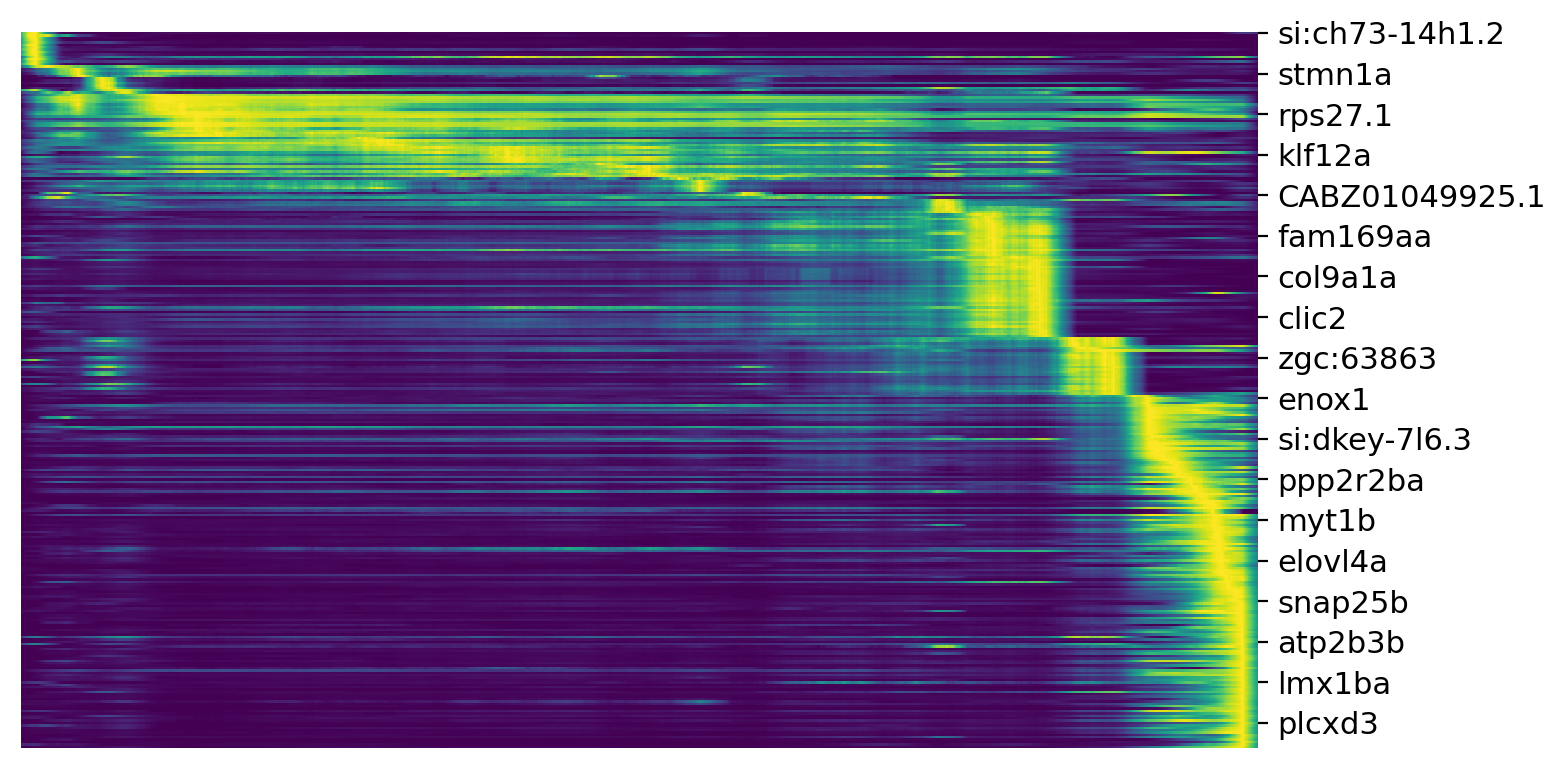

In [ ]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes,tkey='latent_time', n_convolve=100)